In [1]:
# high level neural networks api written in python
# capable of running on top either tensorflow or theano
# similar scikit-learn

In [2]:
# model can be instantiated with Sequential()
# neural networks are built up from bottom to top using add()

In [4]:
import keras

/home/ivan/environments/my_env1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [8]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)

In [9]:
X = scale(X)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

[Text(0,0.5,'Y'),
 Text(0.5,0,'X'),
 Text(0.5,1,'Toy binary classification data set')]

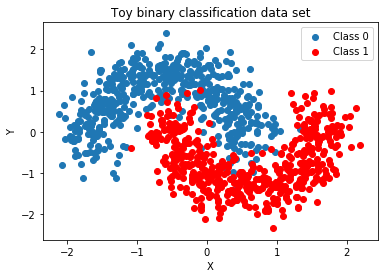

In [12]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set')

In [13]:
model = Sequential()

In [14]:
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='AdaDelta', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [16]:
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1',
                                         histogram_freq=0, write_graph=True,
                                         write_images=False)

In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=200,
         verbose=0, validation_data=(X_test, Y_test), callbacks=[tb_callback])

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print('Test loss', score[0])

Test loss 0.10947140073776244


In [20]:
print('Test accuracy', score[1])

Test accuracy 0.9639999995231628


In [21]:
grid = np.mgrid[-3:3:100j, -3:3:100j]

In [30]:
grid

array([[[-3.        , -3.        , -3.        , ..., -3.        ,
         -3.        , -3.        ],
        [-2.93939394, -2.93939394, -2.93939394, ..., -2.93939394,
         -2.93939394, -2.93939394],
        [-2.87878788, -2.87878788, -2.87878788, ..., -2.87878788,
         -2.87878788, -2.87878788],
        ...,
        [ 2.87878788,  2.87878788,  2.87878788, ...,  2.87878788,
          2.87878788,  2.87878788],
        [ 2.93939394,  2.93939394,  2.93939394, ...,  2.93939394,
          2.93939394,  2.93939394],
        [ 3.        ,  3.        ,  3.        , ...,  3.        ,
          3.        ,  3.        ]],

       [[-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        ...,
        [-3.        , -2.93939394, -2.87878788, ...,  

In [32]:
? np.mgrid()

In [22]:
grid_2d = grid.reshape(2, -1).T

In [31]:
grid_2d

array([[-3.        , -3.        ],
       [-3.        , -2.93939394],
       [-3.        , -2.87878788],
       ...,
       [ 3.        ,  2.87878788],
       [ 3.        ,  2.93939394],
       [ 3.        ,  3.        ]])

In [23]:
X, Y = grid

In [25]:
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)

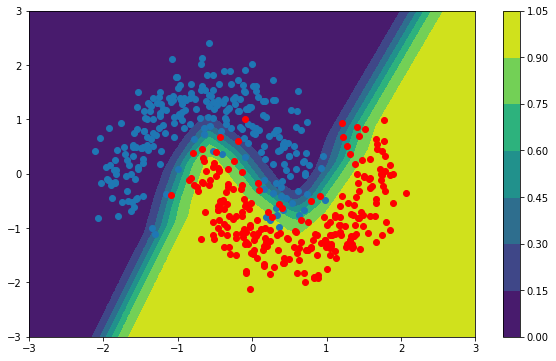

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100,100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)